## Welcome to my First Data Mining Project!!!

In [2]:
# import packages
import pandas as pd

In [3]:
# Load in dataset

coll_student_sleep_data = pd.read_csv(r"C:\Users\jonat\Downloads\college_student_sleep_data2.csv")

In [4]:
# Ensure dataset loaded correctly

coll_student_sleep_data.head()

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


In [ ]:
# Create new dataset with specific questions that are relevant for my project

filtered_coll_student_sleep_data = coll_student_sleep_data.drop(columns=["Timestamp", "1. What is your year of study?", 
    "2. What is your gender?", "11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?",
    "12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",
     "13. How often do you engage in physical activity or exercise?"])

In [6]:
filtered_coll_student_sleep_data

,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,High stress,Average
1,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Low stress,Good
2,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,High stress,Below Average
3,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Extremely high stress,Excellent
4,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Low stress,Average
...,...,...,...,...,...,...,...,...,...,...
991,Often (5-6 times a week),More than 8 hours,Every night,Very good,Often,Always,Sometimes (1-2 times a week),Severe impact,Extremely high stress,Average
992,Rarely (1-2 times a week),6-7 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Sometimes (1-2 times a week),Major impact,Low stress,Good
993,Never,More than 8 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Rarely (1-2 times a month),No impact,High stress,Average
994,Sometimes (3-4 times a week),Less than 4 hours,Never,Average,Never,Rarely,Often (3-4 times a week),Major impact,Extremely high stress,Excellent


In [7]:
# Check column names for debugging - need to copy the actual questions
print(filtered_coll_student_sleep_data.columns.tolist())

['3. How often do you have difficulty falling asleep at night? ', '4. On average, how many hours of sleep do you get on a typical day?', '5. How often do you wake up during the night and have trouble falling back asleep?', '6. How would you rate the overall quality of your sleep?', '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?', '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?', '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?', '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?', '14. How would you describe your stress levels related to academic workload?', '15. How would you rate your overall academic performance (GPA or grades) in the past semester?']


In [ ]:
# Create a dictionary to create simple names for survey questions
question_dictionary = {
    "3. How often do you have difficulty falling asleep at night? ": "difficulty_sleeping",
    "4. On average, how many hours of sleep do you get on a typical day?": "hours_sleeping",
    "5. How often do you wake up during the night and have trouble falling back asleep?": "sleep_interruptions",
    "6. How would you rate the overall quality of your sleep?": "sleep_quality",
    "7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?" : "issues_w_class_focus", 
    "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?": "daily_fatigue",
    "9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?": "class_absences",
    "10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?": "assignment_impact",
    "14. How would you describe your stress levels related to academic workload?": "stress_levels",
    "15. How would you rate your overall academic performance (GPA or grades) in the past semester?": "performance_satisfaction"
}

In [22]:
# Rename columns using the dictionary
renamed_coll_student_sleep_data = filtered_coll_student_sleep_data.rename(columns=question_dictionary)

In [23]:
renamed_coll_student_sleep_data

,difficulty_sleeping,hours_sleeping,sleep_interruptions,sleep_quality,issues_w_class_focus,daily_fatigue,class_absences,assignment_impact,stress_levels,performance_satisfaction
0,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,High stress,Average
1,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Low stress,Good
2,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,High stress,Below Average
3,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Extremely high stress,Excellent
4,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Low stress,Average
...,...,...,...,...,...,...,...,...,...,...
991,Often (5-6 times a week),More than 8 hours,Every night,Very good,Often,Always,Sometimes (1-2 times a week),Severe impact,Extremely high stress,Average
992,Rarely (1-2 times a week),6-7 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Sometimes (1-2 times a week),Major impact,Low stress,Good
993,Never,More than 8 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Rarely (1-2 times a month),No impact,High stress,Average
994,Sometimes (3-4 times a week),Less than 4 hours,Never,Average,Never,Rarely,Often (3-4 times a week),Major impact,Extremely high stress,Excellent


In [24]:
# Check for missing values

renamed_coll_student_sleep_data.isnull().sum()

# No missing values... yay!

difficulty_sleeping         0
hours_sleeping              0
sleep_interruptions         0
sleep_quality               0
issues_w_class_focus        0
daily_fatigue               0
class_absences              0
assignment_impact           0
stress_levels               0
performance_satisfaction    0
dtype: int64

In [25]:
# Use for loop to print out unique values in each column for pre-processing

for column in renamed_coll_student_sleep_data.columns:
    print(f"{column}: {renamed_coll_student_sleep_data[column].unique()}\n")

difficulty_sleeping: ['Often (5-6 times a week)' 'Sometimes (3-4 times a week)' 'Every night'
 'Rarely (1-2 times a week)' 'Never']

hours_sleeping: ['7-8 hours' 'More than 8 hours' '6-7 hours' '4-5 hours'
 'Less than 4 hours']

sleep_interruptions: ['Often (5-6 times a week)' 'Sometimes (3-4 times a week)' 'Every night'
 'Rarely (1-2 times a week)' 'Never']

sleep_quality: ['Good' 'Poor' 'Very good' 'Average' 'Very poor']

issues_w_class_focus: ['Sometimes' 'Often' 'Always' 'Rarely' 'Never']

daily_fatigue: ['Often' 'Sometimes' 'Rarely' 'Always' 'Never']

class_absences: ['Often (3-4 times a week)' 'Sometimes (1-2 times a week)'
 'Rarely (1-2 times a month)' 'Always' 'Never']

assignment_impact: ['Moderate impact' 'Major impact' 'Minor impact' 'No impact'
 'Severe impact']

stress_levels: ['High stress' 'Low stress' 'Extremely high stress' 'No stress']

performance_satisfaction: ['Average' 'Good' 'Below Average' 'Excellent' 'Poor']



### For this project, I will have all values on a 1-5 scale, 5 being the best option and 1 being the worst option

In [ ]:
# Create a mapping dictionary to set all values to ints for easier analysis
value_mapping = {
    "difficulty_sleeping": {
        "Every night": 1,
        "Often (5-6 times a week)": 2,
        "Sometimes (3-4 times a week)": 3,
        "Rarely (1-2 times a week)": 4,
        "Never": 5
    },
    "hours_sleeping": {
        "Less than 4 hours": 1,
        "4-5 hours": 2,
        "6-7 hours": 3,
        "7-8 hours": 4,
        "More than 8 hours": 5
    },
    "sleep_interruptions": {
        "Every night": 1,
        "Often (5-6 times a week)": 2,
        "Sometimes (3-4 times a week)": 3,
        "Rarely (1-2 times a week)": 4,
        "Never": 5
    },
    "sleep_quality": {
        "Very poor": 1,
        "Poor": 2,
        "Average": 3,
        "Good": 4,
        "Very good": 5
    },
    "issues_w_class_focus": {
        "Always": 1,
        "Often": 2,
        "Sometimes": 3,
        "Rarely": 4,
        "Never": 5
    },
    "daily_fatigue": {
        "Always": 1,
        "Often": 2,
        "Sometimes": 3,
        "Rarely": 4,
        "Never": 5
    },
    "class_absences": {
        "Always": 1,
        "Often (3-4 times a week)": 2,
        "Sometimes (1-2 times a week)": 3,
        "Rarely (1-2 times a month)": 4,
        "Never": 5
    },
    "assignment_impact": {
        "Severe impact": 1,
        "Major impact": 2,
        "Moderate impact": 3,
        "Minor impact": 4,
        "No impact": 5
    },
    "stress_levels": {
        "Extremely high stress": 1,
        "High stress": 2,
        "Low stress": 3,
        'Extremely low stress': 4,
        "No stress": 5
    },
    "performance_satisfaction": {
        "Poor": 1,
        "Below Average": 2,
        "Average": 3,
        "Good": 4,
        "Excellent": 5
    }
}

In [27]:
numbered_coll_student_sleep_data = renamed_coll_student_sleep_data.replace(value_mapping)

C:\Users\jonat\AppData\Local\Temp\ipykernel_22352\652224119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numbered_coll_student_sleep_data = renamed_coll_student_sleep_data.replace(value_mapping)


In [28]:
numbered_coll_student_sleep_data

,difficulty_sleeping,hours_sleeping,sleep_interruptions,sleep_quality,issues_w_class_focus,daily_fatigue,class_absences,assignment_impact,stress_levels,performance_satisfaction
0,2,4,2,4,3,2,2,3,2,3
1,2,4,2,4,2,3,3,2,3,4
2,3,4,3,4,2,2,3,2,2,2
3,2,5,3,2,2,2,4,4,1,5
4,2,4,2,5,1,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
991,2,5,1,5,2,1,3,1,1,3
992,4,3,3,3,4,4,3,2,3,4
993,5,5,3,3,4,4,4,5,2,3
994,3,1,5,3,5,4,2,2,1,5


In [29]:
# check unique values again to ensure the mapping method worked correctly 

for column in numbered_coll_student_sleep_data.columns:
    print(f"{column}: {numbered_coll_student_sleep_data[column].unique()}\n")

difficulty_sleeping: [2 3 1 4 5]

hours_sleeping: [4 5 3 2 1]

sleep_interruptions: [2 3 1 4 5]

sleep_quality: [4 2 5 3 1]

issues_w_class_focus: [3 2 1 4 5]

daily_fatigue: [2 3 4 1 5]

class_absences: [2 3 4 1 5]

assignment_impact: [3 2 4 5 1]

stress_levels: [2 3 1 5]

performance_satisfaction: [3 4 2 5 1]



In [30]:
# import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# We are going to use a heatmap to look at the frequency of each value in each column

In [31]:
# To do that, we need a sum for every value in each column
value_counts = numbered_coll_student_sleep_data.apply(lambda x: x.value_counts()).fillna(0).astype(int)

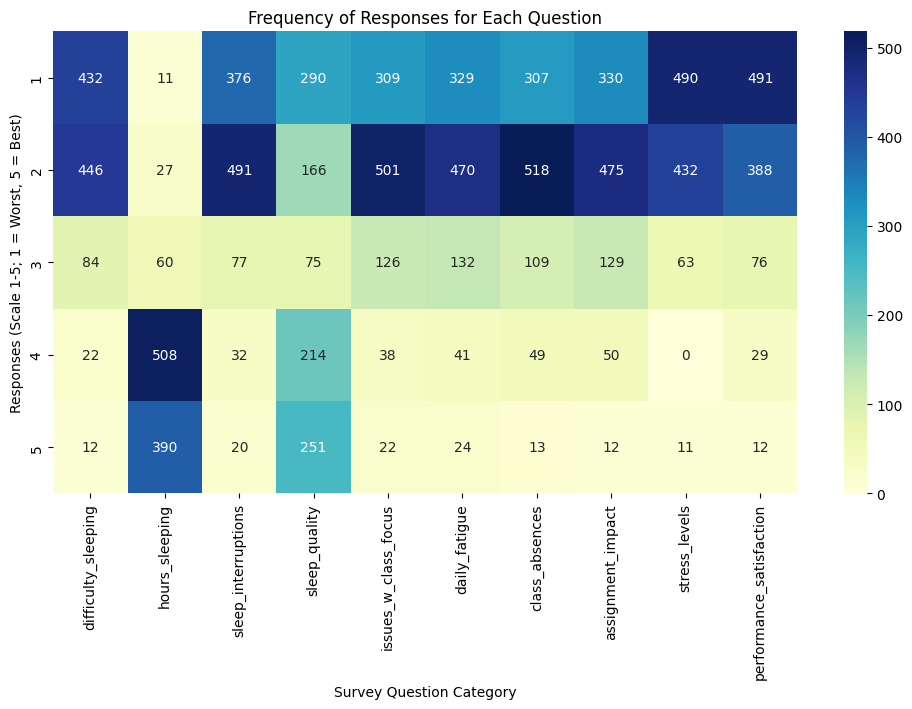

In [32]:
# Using the value counts, use seaborn to create a heatmap to show the frequency of each response for each question

plt.figure(figsize=(12, 6))
sns.heatmap(value_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Frequency of Responses for Each Question")
plt.xlabel("Survey Question Category")
plt.ylabel("Responses (Scale 1-5; 1 = Worst, 5 = Best)")
plt.show()

We clearly see from this that most people surveyed struggled with falling sleeping, staying asleep, and were not satisfied with their class or academic performance. This heatmap shows that the difficulty level of falling asleep seems to have a strong influence on the perceived acamdeic performance, while the duration of sleep does not tend to carry much influence

Perhaps the most lopsided result is the student stress levels, where only 11 respondents said they experience no stress at all, and 0 said they have little stress. We see that 490 respondents (~49% of all respondents) confessed that they face large amounts of stress, which seems to be the result of these students facing difficulty sleeping. Though they have a long sleep duration, and about half have quality sleep, the lack of ease falling asleep seems to be dragging students down. Finding a way for these students to fall asleep easier may prove beneficial in helping students become more satisfied with their academic and classroom performances.

# ---------------------------------------------------------------------------------

# Now let's create a boxplot and get another view of our distribution

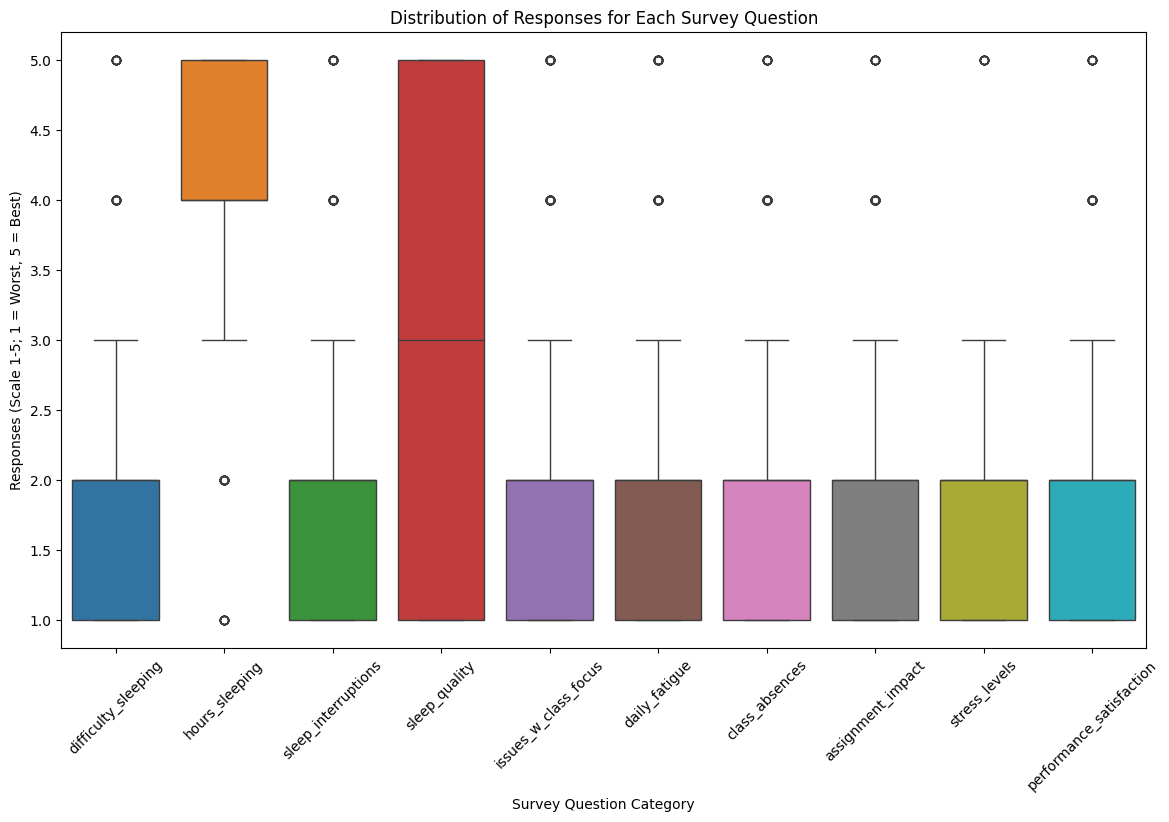

In [ ]:
# Use matplotlib to create figure and seaborn to create the boxplot to show the distribution of responses

plt.figure(figsize=(14, 8))
sns.boxplot(data=numbered_coll_student_sleep_data)
plt.title("Distribution of Responses for Each Survey Question")
plt.xlabel("Survey Question Category")
plt.ylabel("Responses (Scale 1-5; 1 = Worst, 5 = Best)")
plt.xticks(rotation=45)
plt.show()

We see from this boxplot that even though the majority of respondents said they get good hours of sleep, and some quality sleep, they are still experiencing issues focusing in class, experiencing daily fatigue, and their academic performance is not satisfactory. However, we do see the majority of respondents admit they have difficulty sleeping, even if they get a good amount of hours, it may not be the most rejuvinating rest. We can also see that in the responses to the question about sleep quality, as that is fairly evenly-distributed. Therefore, it seems that the duration of sleep does not affect the students' perceived academic performance, but the quality and ease of sleeping has a noticable impact. 

# Impact of Project

This was an interesting project for me, as it has a practial influence on my college experience as much as anyone else, so heading into this I was curious to see what the data would say and what I could learn from my analysis. I believe the biggest insight I saw is to ensure I have an effective night routine that will help ease my body to sleep. Further studies could reveal what practices are best to help the human body fall asleep quicker/easier and see if those strategies truly lead to better academic peformances and practices. 

One aspect of this I believe could cause harm to the general public is the perceived uncorrelation between sleep duration and academic performance. Though this data seems to support the notion that sleep duration has little to no effect, I do not believe that to be true. It is publicly-known that our bodies need 7-8 hours of sleep to truly becomes rested and recover from the rigors of each day. So even though these visualizations seem to contradict that, I believe a more in-depth study would show otherwise. 

Something that should be studied further alongside techniques to fall asleep easier is the affect sleep and stress have on students' actual academic performances. Looking at GPAs and specific project/test grades can paint a different picture and help the researcher learn the true affect of sleep on college students. The perceptions of each student could differ as they have different expectations for themselves, therefore, they may have good grades, but it may not be as high as they hope for, which leads to them being unsatisfied. Their unsatisfaction would give a different insight in this study, as it would suggest a bad grade due to their feelings, and that could incorrectly influence how we view sleep. 

Overall, the main takeaway from this project is to educate yourself on how to fall asleep quickly and easily, which can lead to lower stress levels and a better perceived academic performance.